## GMM Estimation of Model Parameters of Expectation Formation (Stochastic Volatility Process)

- This notebook includes functions that estimate the parameter of rigidity for different models
- It allows for flexible choices of moments to be used, forecast error, disagreement, and uncertainty, etc. 
- It includes 
  - A general function that implements the estimation using the minimum distance algorithm. 
  - Model-specific functions that take real-time data and process parameters as inputs and produces forecasts and moments as outputs. It is model-specific because different models of expectation formation bring about different forecasts. 
  - Auxiliary functions that compute the moments as well as the difference of data and model prediction, which will be used as inputs for GMM estimator. 

## 1. A process of time-varying volatility 

Assume that the inflation follows a process of unobserved component model with stochastical volatility. (UC-SV model by Watson and Stock. 2007)

\begin{equation}
\begin{split}
& y_t = \theta_t + \eta_t,\quad \textrm{where } \eta_t =\sigma_{\eta,t} \xi_{\eta,t} \\
& \theta_t = \theta_{t-1} + \epsilon_t, \quad \textrm{where }  \epsilon_t =\sigma_{\epsilon,t} \xi_{\epsilon,t} \\
& \log\sigma^2_{\eta,t} = \log\sigma^2_{\eta,t-1} + \mu_{\eta,t} \\
& \log\sigma^2_{\epsilon,t} = \log\sigma^2_{\epsilon,t-1} + \mu_{\epsilon,t} 
\end{split}
\end{equation}

The distributions of shocks to levels of the components and their volatilities are, respectively, the following.

\begin{equation}
\begin{split}
& \xi_t =[\xi_{\eta,t},\xi_{\epsilon,t}] \sim N(0,I_2) \\
& \mu_{t} = [\mu_{\eta,t},\mu_{\epsilon,t}]' \sim N(0,\gamma I_2) \\
\end{split}
\end{equation}

The only parameter of the model is $\gamma$, which determines the time-varying volatilities. 

## 2. Different models of expectation formation 

### Rational Expectation

At the point of time $t$, the RE agent sees the realization of all stochastic variables above with subscript $t$, $t-1$, etc, including $y_t$, $\tau_t$, $\eta_t$, $\sigma_{\eta,t}$, $\sigma_{\epsilon,t}$ and their realizations in the whose past. Again, $*$ stands for FIRE benchmark. 

\begin{equation}
\begin{split}
\overline y^*_{t+h|t} \equiv y^*_{t+h|i,t} & =  E^*_{i,t}(y_{t+h}|I_{i,t}) = \theta_t 
\end{split}
\end{equation}

Forecast error is simply the cumulated sum of unrealized shocks from $t$ to $t+h$, which is 

\begin{equation}
\begin{split}
\overline{FE}^*_{t+h|t} \equiv  FE^*_{t+h|i,t} & =  \sum^{h}_{s=1} (\eta_{t+s} + \epsilon_{t+s})
\end{split}
\end{equation}



Conditional h-step-ahead variance, uncertainty is

\begin{equation}
\begin{split}
 \overline{Var}^*_{t+h|t} \equiv  Var^*_{t+h|i,t} & = \sum^{h}_{k=1} E_{i,t}(\sigma^2_{\eta,t+k}) +  E_{i,t}(\sigma^2_{\epsilon,t+k})  \\
& = \sum^{h}_{k=1} E_{i,t}(exp^{\log \sigma^2_{\eta,t}+\sum^h_{k=1}\mu_{\eta,t+k}}) +  E_{i,t}(exp^{\log \sigma^2_{\epsilon,t}+\sum^h_{f=1}\mu_{\epsilon,t+f}} ) \\
& = \sum^{h}_{k=1}\sigma^2_{\eta,t} E_{i,t}(exp^{\sum^h_{k=1}\mu_{t+h,\eta}}) +  \sigma^2_{\epsilon,t} E_{i,t}(exp^{\sum^h_{f=1}\mu_{\epsilon,t+f}} ) \\
& = \sum^{h}_{k=1}\sigma^2_{\eta,t}  exp^{E_{i,t}({\sum^h_{k=1}\mu_{t+k,\eta}})- 0.5Var_{i,t}(\sum^h_{k=1}\mu_{t+k,\eta})} +  \sigma^2_{\epsilon,t} E_{i,t}(exp^{\sum^h_{f=1}\mu_{\epsilon,t+f}} ) \\
& = \sigma^2_{\eta,t} \sum^{h}_{k=1} exp^{- 0.5k\gamma_{\eta}} +  \sigma^2_{\epsilon,t} exp^{- 0.5h\gamma_{\epsilon}} 
\end{split} 
\end{equation}

One immediately see that now the volatility is stochastic at any point of the time. 

For instance, set $h=1$, the conditional volatility for the 1-step-ahead inflation is 

\begin{equation}
\begin{split}
Var^*_{t+1|i,t} =  exp^{- 0.5\gamma_{\eta}} \sigma^2_{\eta,t}  +  exp^{- 0.5\gamma_{\epsilon}} \sigma^2_{\epsilon,t} 
\end{split} 
\end{equation}

Disgreement is zero across agents in RE.


\begin{equation}
\begin{split}
\overline{Disg}^*_{t+h|t} =  0 
\end{split} 
\end{equation}



### Sticky Expectation (SE)


An agent whose most recent up-do-date update happened at $t-\tau$, thus she sees all the realizations of stochastic variables up to $t-\tau$, including $y_{t-\tau}$, $\tau_{t-\tau}$, $\eta_{t-\tau}$, $\sigma_{\eta,t-\tau}$, $\sigma_{\epsilon,t-\tau}$. 

Her forecast is the permanent component that realized at time $t-\tau$. 

\begin{equation}
\begin{split}
y_{t+h|i,t-\tau}  = \theta_{t-\tau} 
\end{split}
\end{equation}

Her forecast uncertainty is 


\begin{equation}
\begin{split}
Var_{t+h|i,t-\tau} & = \sigma^2_{\eta,t-\tau} \sum^{h+\tau}_{k=1} exp^{- 0.5k\gamma_{\eta}} +  \sigma^2_{\epsilon,t-\tau} exp^{- 0.5(h+\tau)\gamma_{\epsilon}}
\end{split} 
\end{equation}

The population average of the two are, respectively, a weighted average of people whose the most update was in $t, t-1... t-\tau, t-\infty$, respectively. 


\begin{equation}
\begin{split}
\overline y^{se}_{t+h|t} & = \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda y_{t+h|t-\tau} \\
& = \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda \theta_{t-\tau}
\end{split} 
\end{equation}



\begin{equation}
\begin{split}
\overline {Var}^{se}_{t+h|t} & = \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda Var_{t+h|t-\tau} \\
& = \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda [ \sigma^2_{\eta,t-\tau} \sum^{h+\tau}_{k=1} exp^{- 0.5k\gamma_{\eta}} +  \sigma^2_{\epsilon,t-\tau} exp^{- 0.5(h+\tau)\gamma_{\epsilon}}]
\end{split} 
\end{equation}

Both forecast errors $\overline{FE}_{t+h|t}$ and disagreements takes similar form to that in AR process with time-invariant volatility. 


\begin{equation}
\begin{split}
\overline {FE}^{se}_{t+h|t} & = \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda {FE}^*_{t+h|t-\tau} 
& = \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda \sum^{\tau+h}_{s=1} (\theta_{t+s} + \epsilon_{t+s})  
\end{split} 
\end{equation}

The disagreement is the following. 


\begin{equation}
\begin{split}
\overline{Disg}^{se}_{t+h|t} & =  \sum^{\infty}_{\tau=0} (1-\lambda)^{2\tau} \lambda^2 (y_{t+h|t-\tau} - \overline y^{se}_{t+h|t})^2  \\
& = \sum^{\infty}_{\tau=0} (1-\lambda)^{2\tau} \lambda^2 (\theta_{t-\tau} - \overline y^{se}_{t+h|t})^2  \\
& = \sum^{\infty}_{\tau=0} (1-\lambda)^{2\tau} \lambda^2 \{\theta_{t-\tau} - \sum^{\infty}_{\tau=0} (1-\lambda)^\tau\lambda \theta_{t-\tau}\}^2  
\end{split} 
\end{equation}


### Noisy Information 

Now, the agent at time $t$ needs to recover the real-time permanent component $\theta_t$ to make the best forecast for future $y_{t+h}$ using nosiy signals.   


\begin{equation}
y^{ni}_{t+h|t}  \equiv  y^{ni}_{t+h|i,t} = \bar \theta_{t|t}
\end{equation}

where $\bar \theta_{t|t}$ is generated through Kalman filtering.  

Assume that the nosiy signals of $\theta_t$ consists of a public signals $s^{pb}_{t}$ and the private signals $s^{pr}_{i,t}$. For simplicity, let us assume the public signal is basically the $y_t$. A more general case would be an independently drawn public signal sequence. The two signals can be again stacked into a vector of $2\times 1$ to $s^\theta_{i,t}$. 

Then the filterred $\theta_{t}$ by agent $i$ is 

\begin{equation}
\begin{split}
\bar \theta_{t|t} =  (1-\tilde P_{t} H) \bar \theta_{t|t-1} + \tilde P s^\theta_{i,t} \\
\end{split}
\end{equation}

where $\theta_{t|t-k}$ is the filterred forecast of $\theta_t$ using all the information up to $t-k$., and $\tilde Pt$ is the time-specific Kalman gain that is dependent on the noisy ratios of signals. 

\begin{equation}
\begin{split}
\tilde P_{t} =  \Sigma^\theta_{i,t|t-1} H(H'\Sigma^\theta_{i,t|t-1} H + \Sigma^\theta_{t})^{-1} 
\end{split}
\end{equation}

Now the noisiness of signals are time varying as well. 

\begin{equation}
\begin{split}
	\Sigma^\theta_t =  \left[ \begin{matrix} 
				\sigma^2_{\eta,t} &  0 \\ 
				0 & \sigma^2_\xi \end{matrix}\right] 
\end{split}               
\end{equation}

where the variance of public signal is the time-varying $\sigma^2_{\eta,t}$ and let us assume the private signals have constant nosiness $\sigma^2_{\xi}$.

The uncertainty matrix evolves in the following manner. 

\begin{equation}
\Sigma^\theta_{i,t|t} = \Sigma^\theta_{i,t|t-1} - \Sigma^\theta_{i,t|t-1} H'(H \Sigma^\theta_{i,t-1} H' +\Sigma^\theta_{t}) H \Sigma^\theta_{i,t|t-1} 
\end{equation}

Notice now that since prior of $\theta_t$ before time period $t$ is a weighted average of previous realizations of $y$ and past signals, current forecast depends on the past realizations even though the rational forecast is up-to-date $\theta_t$. 

Due to the time-varying volatility $\sigma^2_{\eta,t}$, the noisyness of the public signal is also time-varying, which governs the degree of rigidity. For instance, if volatility to the transitory shock is high, the Kalman gain is low, the forecast responds less to the new realizations. 

It is also worth thinking about what is the one-step ahead uncertainty in the context of stochastic valotility world. 


\begin{equation}
\begin{split}
\Sigma^\theta_{i,t|t-1} & = \Sigma^\theta_{i,t-1|t-1} + Var^*_{t|t-1}(y_t) \\
& = \Sigma^\theta_{i,t-1|t-1} +  exp^{- 0.5\gamma_{\eta}} \sigma^2_{\eta,t-1}  +  exp^{- 0.5\gamma_{\epsilon}} \sigma^2_{\epsilon,t-1} 
\end{split}
\end{equation}

## 3. Estimation algorithms 

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import AR
import copy as cp 
from scipy.stats import bernoulli

In [2]:
# a general-purpose estimating function of the parameter
def Estimator(obj_func,
              para_guess,
              method='CG',
              bounds = None,
              options = {'disp': True}):
    """
    Inputs
    ------
    - moments: a function of the rigidity model parameter  
    - method: method of optimization, i.e. 
         -  'L-BFGS-B', bounds=((1e-10, None), (1e-10, None))
    
    Outputs
    -------
    - parameter: an array of estimated parameter
    """
    
    parameter = minimize(obj_func,
                         x0 = para_guess,
                         method = method,
                         bounds = bounds,
                         options = options)['x']
    return parameter 

In [3]:
# a function that prepares moment conditions. So far the loss being simply the norm of the difference
def PrepMom(model_moments,
            data_moments):
    """
    Inputs
    -----
    model_moments: an array of moments from a certain model, i.e. forecast error, disagreement and uncertainty. 
    data_moments: an array of moments computed from the survey data
    
    Outputs
    ------
    diff: the Euclidean distance of two arrays of data and model 
    
    """
    diff = np.linalg.norm((model_moments - data_moments)/data_moments)
    return diff

In [4]:
## auxiliary functions 
def hstepvarSV(h,
               sigmas_now,
               gamma):
    '''
    inputs
    ------
    h: forecast horizon
    sigmas_nows, 2 x 1 vector [sigma_eta, sigma_eps]
    gamma, volatility, scalar. 
    
    outputs
    -------
    scalar: h-step-forward variance 
    '''
    
    var_eta = sigmas_now[0]**2*sum([np.exp(-0.5*(k+1)*gamma) for k in range(h)])
    var_eps = sigmas_now[1]**2*np.exp(-0.5*h*gamma)
    var = var_eta + var_eps
    return var

def ForecastPlot(test):
    x = plt.figure(figsize=([3,13]))
    for i,val in enumerate(test):
        plt.subplot(4,1,i+1)
        plt.plot(test[val],label=val)
        plt.legend(loc=1)
    return x
        
def ForecastPlotDiag(test,
                     data,
                     legends=['model','data']):
    x = plt.figure(figsize=([3,13]))
    for i,val in enumerate(test):
        plt.subplot(4,1,i+1)
        plt.plot(test[val],label= legends[0]+ ': ' +val)
        plt.plot(np.array(data[val]),label=legends[1] +': '+ val)
        plt.legend(loc=1)
    return x
        
### UC-SV simulator 
def UCSV_simulator(gamma,
                   nobs,
                   eta0 = 0):
    svols_eta_shock = np.random.randn(nobs+1)*gamma
    svols_eps_shock = np.random.randn(nobs+1)*gamma
    
    svols_eta = np.zeros(nobs+1)
    svols_eta[0] = 0.001
    svols_eps = np.zeros(nobs+1)
    svols_eps[0] = 0.001
    for i in range(nobs):
        svols_eta[i+1] = np.sqrt( np.exp(np.log(svols_eta[i]**2) + svols_eta_shock[i+1]) ) 
        svols_eps[i+1] = np.sqrt( np.exp(np.log(svols_eps[i]**2) + svols_eps_shock[i+1]) ) 
    shocks_eta = np.multiply(np.random.randn(nobs+1),svols_eta)  
    shocks_eps = np.multiply(np.random.randn(nobs+1),svols_eps)
    
    eta = np.zeros(nobs+1)
    eps = np.zeros(nobs+1)
    
    ## initial level of eta, 0 by defaul
    eta[0] = eta0
    
    for i in range(nobs):
        eta[i+1] = eta[i] + shocks_eta[i+1]
        eps[i+1] = shocks_eps[i+1]
        
    xxx = eta + eps
    return xxx,eta,svols_eta,svols_eps

In [5]:
## some process parameters 

eta0_fake = 0
gamma_fake = 0.1
sigmas_now_fake = [0.2,0.3]

process_para = {'gamma':gamma_fake,
                'eta0':eta0_fake}

In [6]:
## Rational Expectation (RE) class for UCSV model 
class RationalExpectationSV:
    def __init__(self,
                 real_time,
                 history,
                 horizon = 1,
                 process_para = process_para,
                 exp_para = {},
                 moments=['Forecast','FE','Disg','Var']):
        self.real_time = real_time
        self.history = history
        self.horizon = horizon
        self.process_para = process_para
        self.moments = moments
        self.n = len(real_time['eta'])
    
    def GetRealization(self,
                       realized_series):
        self.realized = realized_series
        
    def SimulateRealization(self):
        n = len(self.real_time['eta'])
        ## information set 
        eta_now = self.real_time['eta']
        vol_now = self.real_time['vols']
        
        ## parameters
        gamma = self.process_para['gamma']
        #eta0 = self.process_para['eta0']
        
        realized = np.zeros(n)
        for i in range(n):
            realized[i] = np.asscalar(UCSV_simulator(gamma,
                                                     nobs = 1,
                                                     eta0 = eta_now[i])[0][1:]
                                     )
        self.realized = realized
        
    def Forecaster(self):
        ## parameters
        n = self.n
        gamma = self.process_para['gamma']
        eta0 = self.process_para['eta0']
        
        ## inputs
        real_time = self.real_time
        horizon = self.horizon
        
        ## forecast moments 
        ## now the informationset needs to contain differnt components seperately.
        ## therefore, real_time fed in the begining is a tuple, not just current eta, but also current sigmas. 
        
        infoset = real_time 
        nowcast = infoset['eta']
        forecast = nowcast
        sigmas_now = infoset['vols']
        Var = np.zeros(n)
        for i in range(n):
            Var[i] = hstepvarSV(horizon,
                                sigmas_now = sigmas_now[:,i],
                                gamma = gamma)
        FE = forecast - self.realized ## forecast errors depend on realized shocks 
        Disg = np.zeros(n)
        
        self.forecast_moments = {"Forecast":forecast,
                                 "FE":FE,
                                 "Disg":Disg,
                                 "Var":Var}
        return self.forecast_moments
        
    def RE_EstObjfunc(self,
                      process_para):
        """
        input
        -----
        process_para: the parameters of process to be estimated. 
           No expectation parameters because rational expectation
        
        output
        -----
        the objective function to minmize
        """
        moments = self.moments
        re_process_para = {'gamma':process_para[0],
                           'eta0':process_para[1]}
        self.process_para = re_process_para  # give the process para
        data_moms_dct = self.data_moms_dct
        RE_moms_dct = self.Forecaster().copy()
        RE_moms = np.array([RE_moms_dct[key] for key in moments] )
        data_moms = np.array([data_moms_dct[key] for key in moments] )
        obj_func = PrepMom(RE_moms,data_moms)
        return obj_func 
    
    def GetDataMoments(self,
                       data_moms_dct):
        self.data_moms_dct = data_moms_dct
    
    def ParaEstimate(self,
                     para_guess = np.array([0.5,0.1]),
                     method = 'CG',
                     bounds = None,
                     options = None):
        self.para_est = Estimator(self.RE_EstObjfunc,
                                  para_guess = para_guess,
                                  method = method,
                                  bounds = bounds,
                                  options = options)
    
    def ForecastPlot(self):
        x = plt.figure(figsize=([3,13]))
        for i,val in enumerate(self.moments):
            plt.subplot(4,1,i+1)
            plt.plot(self.forecast_moments[val],label=val)
            plt.legend(loc=1)
            
    def ForecastPlotDiag(self):
        re_process_est_dct = {'gamma':self.para_est[0],
                              'eta0':self.para_est[1]}
        new_instance = cp.deepcopy(self)
        new_instance.process_para = re_process_est_dct
        self.forecast_moments_est = new_instance.Forecaster()
        x = plt.figure(figsize=([3,13]))
        for i,val in enumerate(self.moments):
            plt.subplot(4,1,i+1)
            plt.plot(self.forecast_moments_est[val],'r-',label='model:'+ val)
            plt.plot(np.array(self.data_moms_dct[val]),'*',label='data:'+ val)
            plt.legend(loc=1)

In [7]:
### create a RE instance 
ucsv_fake = UCSV_simulator(gamma_fake,
                           eta0 = eta0_fake,
                           nobs = 200) 
n_burn = 30
# the permanent component

xx_history = ucsv_fake[0]
xx_real_time = xx_history[n_burn:]


xx_pc_history = ucsv_fake[1]
xx_pc_real_time = xx_pc_history[n_burn:]

# the volatility
vol_history = np.array([ucsv_fake[2],ucsv_fake[3]])
vol_real_time = vol_history[:,n_burn:]

xx_real_time_dct = {'eta':xx_pc_real_time,
                   'vols':vol_real_time,
                   'y':xx_real_time}

xx_history_dct = {'eta':xx_pc_history,
                  'vols':vol_history,
                  'y':xx_history}

RE_instance = RationalExpectationSV(real_time = xx_real_time_dct,
                                    history = xx_history_dct)

In [8]:
### simulate a realized series 
RE_instance.SimulateRealization()

### forecster
re_moms = RE_instance.Forecaster()
#RE_instance.ForecastPlot()

In [9]:
## estimate rational expectation model 
RE_instance.GetDataMoments(re_moms)
RE_instance.moments=['Forecast','FE','Var']

#para_guess = [0.5,0.2]
#RE_instance.ParaEstimate(method='BFGS',
#                         para_guess = para_guess,
#                         options={'disp':True})
#RE_instance.para_est#RE_instance.ForecastPlotDiag()

In [17]:
## SE expectation parameters 
SE_para_default = {'lambda':0.3}

In [18]:
## Sticky Expectation(SE) class 
class StickyExpectationSV:
    def __init__(self,
                 real_time,
                 history,
                 horizon = 1,
                 process_para = process_para,
                 exp_para = SE_para_default,
                 moments = ['Forecast','Disg','Var']):
        self.history = history
        self.real_time = real_time
        self.n = len(real_time['eta'])
        self.horizon = horizon
        self.process_para = process_para
        self.exp_para = exp_para
        self.data_moms_dct ={}
        self.para_est = {}
        self.moments = moments
        
    def GetRealization(self,
                       realized_series):
        self.realized = realized_series   
    
    def SimulateRealization(self):
        n = len(self.real_time['eta'])
        ## information set 
        eta_now = self.real_time['eta']
        vol_now = self.real_time['vols']
        
        ## parameters
        gamma = self.process_para['gamma']
        #eta0 = self.process_para['eta0']
        
        realized = np.zeros(n)
        for i in range(n):
            realized[i] = np.asscalar(UCSV_simulator(gamma,
                                                     nobs = 1,
                                                     eta0 = eta_now[i])[0][1:]
                                     )
        self.realized = realized
        
    def Forecaster(self):
        ## inputs 
        real_time = self.real_time
        history = self.history
        n = self.n
        ## process parameters
        gamma = self.process_para['gamma']
        
        ## exp parameter
        lbd = self.exp_para['lambda']
        horizon = self.horizon      
        n_burn = len(history['eta']) - n
        n_history = n + n_burn  # of course equal to len(history)
        
        infoset = history
        
        ## history 
        eta_now_history = infoset['eta']
        sigmas_now_history = infoset['vols']
        
        ## forecast moments 
        ## uncertainty 
        Var_array = np.empty(n)
        for i in range(n):
            Var_array[i] = sum([lbd*(1-lbd)**tau*hstepvarSV(tau+horizon,sigmas_now_history[:,i+n_burn-tau],gamma) for tau in range(i + n_burn)])
        Var = Var_array
        
        # average forecast 
        nowcast_array = np.empty(n)
        for i in range(n):
            nowcast_array[i] = sum([lbd*(1-lbd)**tau*eta_now_history[i+n_burn-tau] for tau in range(i+n_burn)])
        nowcast = nowcast_array
        forecast = nowcast
        
        # forecast errors
        FE = forecast - self.realized
        
        ## diagreement 
        Disg_array = np.empty(n)
        for i in range(n):
            Disg_array[i] = sum([lbd*(1-lbd)**tau*(eta_now_history[i+n_burn-tau] - forecast[i])**2 for tau in range(i+n_burn)])
        Disg = Disg_array
        self.forecast_moments = {"Forecast":forecast,
                                 "FE":FE,
                                 "Disg":Disg,
                                 "Var":Var}
        return self.forecast_moments
    
    def ForecasterbySim(self,
                        n_sim = 100):
        ## inputs 
        real_time = self.real_time
        history = self.history
        n = self.n
        realized = self.realized
        ## process parameters
        gammas = self.process_para['gamma']
        
        ## exp parameter
        lbd = self.exp_para['lambda']
        horizon = self.horizon      
        n_burn = len(history['eta']) - n
        n_history = n + n_burn  # of course equal to len(history)
        
        infoset = history
        
        ## history 
        eta_now_history = infoset['eta']
        sigmas_now_history = infoset['vols']
    
        
        ## simulation
        np.random.seed(12344)
        update_or_not = bernoulli.rvs(p = lbd,
                                      size=[n_sim,n_history])
        most_recent_when = np.matrix(np.empty([n_sim,n_history]),dtype=int)
        nowcasts_to_burn = np.matrix(np.empty([n_sim,n_history]))
        Vars_to_burn = np.matrix(np.empty([n_sim,n_history]))
        
        ## look back for the most recent last update for each point of time  
        for i in range(n_sim):
            for j in range(n_history):
                if any([x for x in range(j) if update_or_not[i,j-x] == True]):
                    most_recent_when[i,j] = min([x for x in range(j) if update_or_not[i,j-x] == True])
                else:
                    most_recent_when[i,j] = j
                nowcasts_to_burn[i,j] = eta_now_history[j - most_recent_when[i,j]]
                Vars_to_burn[i,j]= hstepvarSV((most_recent_when[i,j]+horizon),sigmas_now_history[:,j-most_recent_when[i,j]],gammas)
        
        ## burn initial forecasts since history is too short 
        nowcasts = np.array( nowcasts_to_burn[:,n_burn:] )
        forecasts = nowcasts
        Vars = np.array( Vars_to_burn[:,n_burn:])
        
        ## compuate population moments
        forecasts_mean = np.mean(forecasts,axis=0)
        forecasts_var = np.var(forecasts,axis=0)
        if realized is not None:
            FEs_mean = forecasts_mean - realized
        elif self.sim_realized is not None:
            FEs_mean = forecasts_mean - self.sim_realized
        Vars_mean = np.mean(Vars,axis=0) ## need to change 
        
        self.forecast_moments_sim = {"Forecast":forecasts_mean,
                                     "FE":FEs_mean,
                                     "Disg":forecasts_var,
                                     "Var":Vars_mean}
        return self.forecast_moments_sim
    
    ## a function estimating SE model parameter only 
    def SE_EstObjfunc(self,
                      lbd):
        """
        input
        -----
        lbd: the parameter of SE model to be estimated
        
        output
        -----
        the objective function to minmize
        """
        moments = self.moments
        SE_para = {"lambda":lbd}
        self.exp_para = SE_para  # give the new lambda
        data_moms_dct = self.data_moms_dct
        SE_moms_dct = self.Forecaster().copy()
        SE_moms = np.array([SE_moms_dct[key] for key in moments] )
        data_moms = np.array([data_moms_dct[key] for key in moments] )
        obj_func = PrepMom(SE_moms,data_moms)
        return obj_func 
    
    def SE_EstObjfuncSim(self,
                         lbd):
        """
        input
        -----
        lbd: the parameter of SE model to be estimated
        
        output
        -----
        the objective function to minmize
        """
        moments = self.moments
        SE_para = {"lambda":lbd}
        self.exp_para = SE_para  # give the new lambda
        data_moms_dct = self.data_moms_dct
        SE_moms_dct = self.ForecasterbySim().copy()
        SE_moms = np.array([SE_moms_dct[key] for key in moments] )
        data_moms = np.array([data_moms_dct[key] for key in moments] )
        obj_func = PrepMom(SE_moms,data_moms)
        return obj_func
    
    ## feeds the instance with data moments dictionary 
    def GetDataMoments(self,
                       data_moms_dct):
        self.data_moms_dct = data_moms_dct
        
    ## invoke the estimator 
    def ParaEstimate(self,
                     para_guess = np.array([0.4]),
                     method='BFGS',
                     bounds = None,
                     options = None):
        self.para_est = Estimator(self.SE_EstObjfunc,
                                  para_guess = para_guess,
                                  method = method,
                                  bounds = bounds,
                                  options = options)
        return self.para_est
        
    def ParaEstimateSim(self,
                     para_guess = np.array([0.4]),
                     method='BFGS',
                     bounds = None,
                     options = None):
        self.para_est_sim = Estimator(self.SE_EstObjfuncSim,
                                  para_guess=para_guess,
                                  method = method,
                                  bounds = bounds,
                                  options = options)
        return self.para_est_sim
        
    def ForecastPlot(self):
        x = plt.figure(figsize=([3,13]))
        for i,val in enumerate(self.moments):
            plt.subplot(4,1,i+1)
            plt.plot(self.forecast_moments[val],label=val)
            plt.legend(loc=1)
            
    def ForecastPlotDiag(self,
                         all_moms = False,
                         diff_scale = False):
        exp_para_est_dct = {'lambda':self.para_est[0]}
        new_instance = cp.deepcopy(self)
        new_instance.exp_para = exp_para_est_dct
        self.forecast_moments_est = new_instance.Forecaster()
        plt.style.use('ggplot')
        if all_moms == False:
            moments_to_plot = self.moments
        else:
            moments_to_plot = self.all_moments
            
        m_ct = len(moments_to_plot)
        x = plt.figure(figsize=([3,3*m_ct]))
        if diff_scale == False:
            for i,val in enumerate(moments_to_plot):
                plt.subplot(m_ct,1,i+1)
                plt.plot(self.forecast_moments_est[val],'s-',label='model:'+ val)
                plt.plot(np.array(self.data_moms_dct[val]),'o-',label='data:'+ val)
                plt.legend(loc=1)
        if diff_scale == True:
            for i,val in enumerate(moments_to_plot):
                ax1 = plt.subplot(m_ct,1,i+1)
                ax1.plot(self.forecast_moments_est[val],'rs-',label='model:'+ val)
                ax1.legend(loc=0)
                ax2 = ax1.twinx()
                ax2.plot(np.array(self.data_moms_dct[val]),'o-',color='steelblue',label='(RHS) data:'+ val)
                ax2.legend(loc=3)

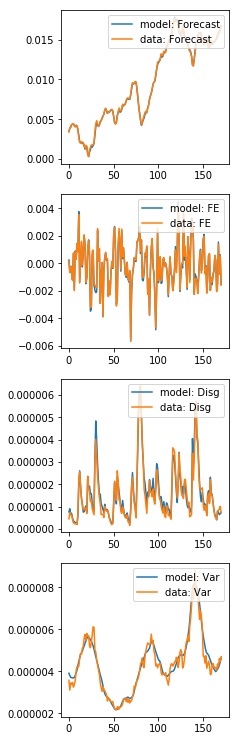

In [19]:
SE_instance = StickyExpectationSV(real_time = xx_real_time_dct,
                                  history = xx_history_dct,
                                  moments = ['Forecast','FE','Disg','Var'])
SE_instance.SimulateRealization()

### simulate a realized series 
mom_dct =  SE_instance.Forecaster()
#SE_instance.ForecastPlot()
mom_sim_dct = SE_instance.ForecasterbySim(n_sim=100)
mom_sim_and_pop = ForecastPlotDiag(mom_dct,mom_sim_dct)

In [20]:
### fake data moments 
data_moms_dct_fake = SE_instance.Forecaster()

In [21]:
#SE_instance.ForecastPlot()

In [22]:
### feed the data moments
SE_instance.GetDataMoments(data_moms_dct_fake)

In [23]:
### invoke generalized estimation 
#SE_instance.ParaEstimate(para_guess = np.array([0.4]),
#                         method = 'CG',
#                         options = {'disp':True})
#SE_instance.para_est

In [24]:
### invoke simulated estimation 
SE_instance.moments =['FE','Disg','Var']
SE_instance.ParaEstimateSim(para_guess = 0.4,
                            method = 'Nelder-Mead',
                            options = {'disp':True})

Optimization terminated successfully.
         Current function value: 4.975557
         Iterations: 15
         Function evaluations: 30


array([0.3071875])

In [20]:
#SE_instance.para_est

In [21]:
#SE_instance.ForecastPlotDiag()

In [22]:
## Noisy Information(NI) class 

class NoisyInformationSV:
    def __init__(self,
                 real_time,
                 history,
                 horizon = 1,
                 process_para = process_para, 
                 exp_para = {'sigma_pb':0.1,
                             'sigma_pr':0.1,
                             'var_init':1},
                 moments = ['Forecast','FE','Disg','Var']):
        self.real_time = real_time
        self.history = history
        self.n = len(real_time['eta'])
        self.horizon = horizon
        self.process_para = process_para
        self.exp_para = exp_para
        self.data_moms_dct ={}
        self.para_est = {}
        self.moments = moments
    
    def GetRealization(self,
                       realized_series):
        self.realized = realized_series   
    
    def SimulateRealization(self):
        n = len(self.real_time['eta'])
        ## information set 
        eta_now = self.real_time['eta']
        vol_now = self.real_time['vols']
        
        ## parameters
        gamma = self.process_para['gamma']
        #eta0 = self.process_para['eta0']
        
        realized = np.zeros(n)
        for i in range(n):
            realized[i] = np.asscalar(UCSV_simulator(gamma,
                                                     nobs = 1,
                                                     eta0 = eta_now[i])[0][1:]
                                     )
        self.realized = realized
        
    def SimulateSignals(self,
                        self_filter = False):
        n = self.n
        n_history = len(self.history['eta'])
        sigma_pb = self.exp_para['sigma_pb']
        sigma_pr =self.exp_para['sigma_pr']
        eta_history = self.history['eta']
        if self_filter == True:
            s_pb = history['y']
        else:
            s_pb = eta_history + sigma_pb*np.random.randn(n_history)
        s_pr = eta_history + sigma_pr*np.random.randn(n_history)
        self.signals = np.asmatrix(np.array([s_pb,s_pr]))
        self.signals_pb = s_pb
        
    def SimulateSignals2(self):
        n = self.n
        n_history = len(self.history)
        sigma_pb = self.exp_para['sigma_pb']
        sigma_pr =self.exp_para['sigma_pr']
        s_pb = self.history + sigma_pb*np.random.randn(n_history)
        s_pr = self.history + sigma_pr*np.random.randn(n_history)
        self.signals = np.asmatrix(np.array([s_pb,s_pr]))
        self.signals_pb = s_pb
        
    # a function that generates population moments according to NI 
    def Forecaster(self):
        
        ## inputs 
        real_time = self.real_time
        history = self.history
        n = self.n
        n_burn = len(history['eta']) - n
        n_history = n + n_burn  # of course equal to len(history)
        
        ## process parameters
        gamma = self.process_para['gamma']
        eta0 = self.process_para['eta0']
        
        ## exp parameters 
        
        sigma_pb = self.exp_para['sigma_pb']
        sigma_pr =self.exp_para['sigma_pr']
        var_init = self.exp_para['var_init']
        
        ## history 
        eta_now_history = history['eta']
        sigmas_now_history = history['vols']
        
        ## other pameters 
        horizon = self.horizon      
        signals = self.signals
        sigma_v = np.asmatrix([[sigma_pb**2,0],[0,sigma_pr**2]]) ## this need to change to time variant
        nb_s = len(self.signals) ## # of signals 
        H = np.asmatrix ([[1,1]]).T
        
        ## matrix to fill
        Pkalman = np.zeros([n_history,nb_s])
        nowcast_to_burn = np.zeros(n_history)
        nowcast_to_burn[0] = history['eta'][0]
        nowvar_to_burn = np.zeros(n_history)
        nowvar_to_burn[0] = var_init
        Var_to_burn = np.zeros(n_history)
        nowdisg_to_burn = np.zeros(n_history)
        nowdisg_to_burn[0] = sigma_pr**2 
     
        ## forecast moments        
        for t in range(n_history-1):
            step1var = hstepvarSV(1,
                                  sigmas_now_history[:,t],
                                  gamma)
            step1_vars_to_burn = nowvar_to_burn[t] + step1var
            nowvar_to_burn[t+1] = step1_vars_to_burn - step1_vars_to_burn*\
                                          H.T*np.linalg.inv(H*step1_vars_to_burn*H.T+sigma_v)*H*step1_vars_to_burn
            Pkalman[t+1,:] = step1_vars_to_burn*H.T*np.linalg.inv(H*step1_vars_to_burn*H.T+sigma_v)
            nowcast_to_burn[t+1] = (1-Pkalman[t+1,:]*H)*nowcast_to_burn[t] + Pkalman[t+1,:]*signals[:,t+1]
            nowdisg_to_burn[t+1] = (1-Pkalman[t+1,:]*H)**2*nowdisg_to_burn[t] + Pkalman[t+1,1]**2*sigma_pr**2
        nowcast = nowcast_to_burn[n_burn:]
        forecast = nowcast    
        FE = forecast - self.realized  

        for t in range(n_history):
            stephvar = hstepvarSV(horizon,
                                  sigmas_now_history[:,t],
                                  gamma)
            Var_to_burn[t] = nowvar_to_burn[t] + stephvar
        Var = Var_to_burn[n_burn:] 
        
        nowdisg = nowdisg_to_burn[n_burn:]
        Disg = nowdisg
        
        self.Kalman = Pkalman
        self.forecast_moments = {"Forecast":forecast,
                                 "FE":FE,
                                 "Disg":Disg,
                                 "Var":Var}
        
        return self.forecast_moments
    
    def ForecasterbySim(self,
                       n_sim = 100):
        ## inputs 
        real_time = self.real_time
        history = self.history
        n = self.n
        n_burn = len(history['eta']) - n
        n_history = n + n_burn  # of course equal to len(history)
        
        ## process parameters
        gammas = self.process_para['gammas']
        eta0 = self.process_para['eta0']
        
        ## exp parameters 
        
        sigma_pb = self.exp_para['sigma_pb']
        sigma_pr =self.exp_para['sigma_pr']
        var_init = self.exp_para['var_init']
        
        ## history 
        eta_now_history = history['eta']
        sigmas_now_history = history['vols']
        
        ## other pameters 
        horizon = self.horizon      
        signals = self.signals
        sigma_v = np.asmatrix([[sigma_pb**2,0],[0,sigma_pr**2]]) ## this need to change to time variant
        nb_s = len(self.signals) ## # of signals 
        H = np.asmatrix ([[1,1]]).T
        
        # randomly simulated signals 
        signal_pb = self.signals_pb 
        signals_pr = eta_now_history + sigma_pr*np.random.randn(n_sim*n_history).reshape([n_sim,n_history])
        
        ## prepare matricies 
        nowcasts_to_burn = np.zeros([n_sim,n_history])
        nowcasts_to_burn[:,0] = eta_now_history[0]
        nowvars_to_burn = np.zeros([n_sim,n_history])
        nowvars_to_burn[:,0] = var_init
        Vars_to_burn = np.zeros([n_sim,n_history])
        
        
        ## fill the matricies for individual moments        
        for i in range(n_sim):
            signals_this_i = np.asmatrix(np.array([signal_pb,signals_pr[i,:]]))
            Pkalman = np.zeros([n_history,nb_s])
            Pkalman[0,:] = 0 
            for t in range(n_history-1):
                step1var = hstepvarSV(1,
                                      sigmas_now_history[:,t],
                                      gammas)
                step1_vars_to_burn = nowvars_to_burn[i,t] + step1var
                nowvars_to_burn[i,t+1] = step1_vars_to_burn - step1_vars_to_burn*\
                                          H.T*np.linalg.inv(H*step1_vars_to_burn*H.T+sigma_v)*H*step1_vars_to_burn
                Pkalman[t+1,:] = step1_vars_to_burn*H.T*np.linalg.inv(H*step1_vars_to_burn*H.T+sigma_v)
                nowcasts_to_burn[i,t+1] = (1-Pkalman[t+1,:]*H)*nowcasts_to_burn[i,t]+ Pkalman[t+1,:]*signals_this_i[:,t+1]
            for t in range(n_history):
                stephvar = hstepvarSV(horizon,
                                  sigmas_now_history[:,t],
                                  gammas)
                Vars_to_burn[i,t] = nowvars_to_burn[i,t] + stephvar
                
        nowcasts = nowcasts_to_burn[:,n_burn:]
        forecasts = nowcasts 
        Vars = Vars_to_burn[:,n_burn:]
        
        ## compuate population moments
        forecasts_mean = np.mean(forecasts,axis=0)
        forecasts_var = np.var(forecasts,axis=0)
        FEs_mean = forecasts_mean - self.realized
        Vars_mean = np.mean(Vars,axis=0) ## need to change for time-variant volatility
        
        self.forecast_moments_sim = {"Forecast":forecasts_mean,
                                     "FE":FEs_mean,
                                     "Disg":forecasts_var,
                                     "Var":Vars_mean}
        return self.forecast_moments_sim
    
    ## a function estimating SE model parameter only 
    def NI_EstObjfunc(self,
                      ni_paras):
        """
        input
        -----
        sigma: the parameters of NI model to be estimated. A vector of sigma_pb and sigma_pr
        
        output
        -----
        the objective function to minmize
        """
        moments = self.moments
        NI_para = {"sigma_pb":ni_paras[0],
                  "sigma_pr":ni_paras[1],
                  'var_init':ni_paras[2]}
        self.exp_para = NI_para  # give the new parameters 
        data_moms_dct = self.data_moms_dct
        NI_moms_dct = self.Forecaster()
        NI_moms = np.array([NI_moms_dct[key] for key in moments] )
        data_moms = np.array([data_moms_dct[key] for key in moments] )
        obj_func = PrepMom(NI_moms,data_moms)
        return obj_func 
    
    ## feeds the instance with data moments dictionary 
    def GetDataMoments(self,
                       data_moms_dct):
        self.data_moms_dct = data_moms_dct
        
    ## invoke the estimator 
    def ParaEstimate(self,
                     para_guess=np.array([0.2,0.2,0.2]),
                     method='CG',
                     bounds = None,
                     options = None):
        self.para_est = Estimator(self.NI_EstObjfunc,
                                  para_guess = para_guess,
                                  method = method,
                                  bounds = bounds,
                                  options = options)
        return self.para_est
    
    ## plot functions
    def ForecastPlot(self):
        x = plt.figure(figsize=([3,13]))
        for i,val in enumerate(self.moments):
            plt.subplot(4,1,i+1)
            plt.plot(self.forecast_moments[val],label = val)
            plt.legend(loc=1)
    
    ## diagostic plots 
    
    def ForecastPlotDiag(self,
                         all_moms = False,
                         diff_scale = False):
        exp_para_est_dct = {'sigma_pb':self.para_est[0],
                           'sigma_pr':self.para_est[1],
                           'var_init':self.para_est[2]}
        new_instance = cp.deepcopy(self)
        new_instance.exp_para = exp_para_est_dct
        self.forecast_moments_est = new_instance.Forecaster()
        plt.style.use('ggplot')
        if all_moms == False:
            moments_to_plot = self.moments
        else:
            moments_to_plot = self.all_moments

        m_ct = len(moments_to_plot)
        x = plt.figure(figsize=([3,3*m_ct]))
        if diff_scale == False:
            for i,val in enumerate(moments_to_plot):
                plt.subplot(m_ct,1,i+1)
                plt.plot(self.forecast_moments_est[val],'s-',label='model:'+ val)
                plt.plot(np.array(self.data_moms_dct[val]),'o-',label='data:'+ val)
                plt.legend(loc=1)
        if diff_scale == True:
            for i,val in enumerate(moments_to_plot):
                ax1 = plt.subplot(m_ct,1,i+1)
                ax1.plot(self.forecast_moments_est[val],'rs-',label='model:'+ val)
                ax1.legend(loc=0)
                ax2 = ax1.twinx()
                ax2.plot(np.array(self.data_moms_dct[val]),'o-',color='steelblue',label='(RHS) data:'+ val)
                ax2.legend(loc=3)
                
    def ForecastPlotDiag2(self,
                         all_moms = False,
                         diff_scale = False):
        exp_para_est_dct = {'lambda':self.para_est[0]}
        new_instance = cp.deepcopy(self)
        new_instance.exp_para = exp_para_est_dct
        self.forecast_moments_est = new_instance.Forecaster()
        plt.style.use('ggplot')
        if all_moms == False:
            moments_to_plot = self.moments
        else:
            moments_to_plot = self.all_moments
            
        m_ct = len(moments_to_plot)
        x = plt.figure(figsize=([3,3*m_ct]))
        if diff_scale == False:
            for i,val in enumerate(moments_to_plot):
                plt.subplot(m_ct,1,i+1)
                plt.plot(self.forecast_moments_est[val],'s-',label='model:'+ val)
                plt.plot(np.array(self.data_moms_dct[val]),'o-',label='data:'+ val)
                plt.legend(loc=1)
        if diff_scale == True:
            for i,val in enumerate(moments_to_plot):
                ax1 = plt.subplot(m_ct,1,i+1)
                ax1.plot(self.forecast_moments_est[val],'rs-',label='model:'+ val)
                ax1.legend(loc=0)
                ax2 = ax1.twinx()
                ax2.plot(np.array(self.data_moms_dct[val]),'o-',color='steelblue',label='(RHS) data:'+ val)
                ax2.legend(loc=3)

In [23]:
## test of ForecasterbySim

ni_instance = NoisyInformationSV(real_time = xx_real_time_dct,
                                 history = xx_history_dct,
                                 moments = ['Forecast','FE','Disg','Var'])


In [24]:
## simulate signals
ni_instance.SimulateRealization()
ni_instance.SimulateSignals()

In [141]:
## look the signals 
#plt.plot(ni_instance.history['eta'],label=r'$\theta$')
#plt.plot(ni_instance.signals[0,:].T,'*',label=r'$s_{pb}$')
#plt.plot(ni_instance.signals[1,:].T,'v',label=r'$s_{pr}$')
#plt.legend(loc=0)

In [142]:
## forecast by simulating
#ni_mom_sim = ni_instance.ForecasterbySim(n_sim=200)
#ni_plot_sim = ForecastPlot(ni_mom_sim)

In [127]:
#plt.plot(ni_instance.real_time['eta'])
#plt.plot(ni_mom_sim['Forecast'])

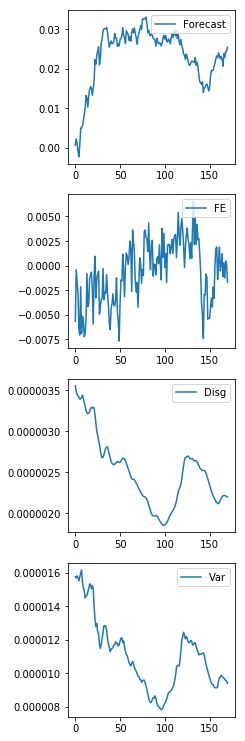

In [26]:
## compare pop and simulated 
#ni_mom_dct =  ni_instance.Forecaster()
#ni_instance.ForecastPlot()

In [174]:
#ni_mom_sim_and_pop = ForecastPlotDiag(ni_mom_dct,
#                                      ni_mom_sim,
#                                     legends=['computed','simulated'])

In [175]:
#plt.plot(ni_instance.realized,label='Realized')
#plt.plot(ni_mom_dct['Forecast'],label='Forecast')
#plt.legend(loc=1)

In [176]:
#ni_instance.ForecastPlot()

In [27]:
## Estimate NI using fake data. 
#ni_mom_dct =  ni_instance.Forecaster()

#fake_data_moms_dct = ni_mom_dct
#ni_instance.GetDataMoments(fake_data_moms_dct)

#ni_instance.ParaEstimate(para_guess=[0.01,0.02,1],
#                         method = 'CG',
#                         options = {'disp':True})
#params_est_NI = ni_instance.para_est
#print(params_est_NI)

         Current function value: 0.000566
         Iterations: 19
         Function evaluations: 717
         Gradient evaluations: 141
[0.00999994 0.00999998 1.        ]


In [189]:
#ni_instance.ParaEstimate(method = 'CG',
#                         options = {'disp':True})
#params_est_NI = ni_instance.para_est
#print(params_est_NI)

         Current function value: 0.000003
         Iterations: 58
         Function evaluations: 1067
         Gradient evaluations: 211
[0.50000002 0.49999993 1.00022261]


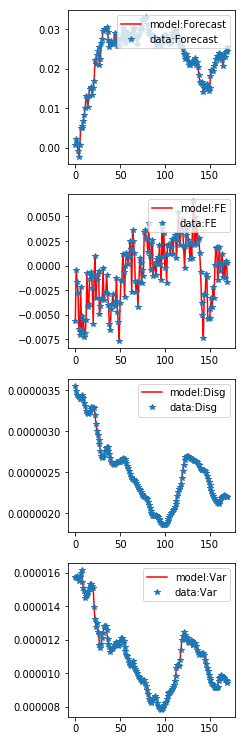

In [28]:
#ni_instance.ForecastPlotDiag()

In [34]:
## parameter learning estimator 
#PL_para_default = SE_para_default

In [35]:
### Paramter Learning(PL) class 

class ParameterLearningSV:
    def __init__(self,real_time,
                 history,
                 horizon=1,
                 process_para = process_para,
                 exp_para = {},
                 max_back =10,
                 moments=['Forecast','Disg','Var']):
        self.real_time = real_time
        self.history = history 
        self.n = len(real_time)
        self.horizon = horizon
        self.process_para = process_para
        self.exp_para = exp_para
        self.max_back = max_back
        self.data_moms_dct ={}
        self.para_est = {}
        self.moments = moments
        
    def GetRealization(self,realized_series):
        self.realized = realized_series   
    
    def SimulateRealization(self):
        n = self.n
        rho = self.process_para['rho']
        sigma =self.process_para['sigma']
        shocks = np.random.randn(n)*sigma
        realized = np.zeros(n)
        for i in range(n):
            cum_shock = sum([rho**h*shocks[h] for h in range(self.horizon)])
            realized[i] = rho**self.horizon*self.real_time[i] +cum_shock
        self.realized = realized
    
    def LearnParameters(self):
        n = self.n
        history = self.history
        n_burn = len(history) - n
        n_history = n + n_burn  # of course equal to len(history)
        real_time = self.real_time
        history = self.history
        rhos_to_burn = np.zeros(n_history)
        sigmas_to_burn = np.zeros(n_history)
        
        
        for i in range(n_history):
            ## OLS parameter learning here
            if i >=2:
                x = history[0:i]
                model = AR(x)
                ar_rs = model.fit(1,trend='nc')
                rhos_to_burn[i] = ar_rs.params[0]
                sigmas_to_burn[i] = np.sqrt(sum(ar_rs.resid**2)/(len(x)-1))
            else:
                pass 
        self.rhos = rhos_to_burn[n_burn:]
        self.sigmas = sigmas_to_burn[n_burn:]
        self.process_para_learned = {'rho':self.rhos,
                                    'sigma':self.sigmas}
    
    def Forecaster(self):
        ## parameters
        n = len(self.real_time)
        rhos = self.process_para_learned['rho']
        sigmas =self.process_para_learned['sigma']
        
        ## parameters
        max_back = self.max_back
        real_time = self.real_time
        horizon = self.horizon
        
        ## forecast moments 
        Disg = np.zeros(n)
        infoset = real_time
        nowcast = infoset
        forecast = np.multiply(rhos**horizon,nowcast)
        Var = [hstepvar(horizon,sigmas[i],rhos[i]) for i in range(n)] # this does not include var parameter
        FE = forecast - self.realized ## forecast errors depend on realized shocks 
        self.forecast_moments = {"Forecast":forecast, 
                "FE":FE,
                "Disg":Disg,
                "Var":Var}
        return self.forecast_moments
    
    ## a function estimating SE model parameter only 
    def PL_EstObjfunc(self,lbd):
        """
        input
        -----
        lbd: the parameter of PL model to be estimated
        
        output
        -----
        the objective function to minmize
        """
        moments = self.moments
        PL_para = {"lambda":lbd}
        self.exp_para = PL_para  # give the new lambda
        data_moms_dct = self.data_moms_dct
        
        PL_moms_dct = self.Forecaster()
        PL_moms = np.array([PL_moms_dct[key] for key in moments] )
        data_moms = np.array([data_moms_dct[key] for key in moments] )
        obj_func = PrepMom(PL_moms,data_moms)
        return obj_func 
    
    ## feeds the instance with data moments dictionary 
    def GetDataMoments(self,data_moms_dct):
        self.data_moms_dct = data_moms_dct
        
    ## invoke the estimator 
    def ParaEstimate(self,para_guess=0.2,method='CG'):
        self.para_est = Estimator(self.PL_EstObjfunc,para_guess=para_guess,method='CG')
        
    def ForecastPlot(self):
        x = plt.figure(figsize=([3,13]))
        for i,val in enumerate(self.moments):
            plt.subplot(4,1,i+1)
            plt.plot(self.forecast_moments[val],label=val)
            plt.legend(loc=1)

In [36]:
## try parameter learning 
#xx_history = AR1_simulator(rho,sigma,100)
#xx_real_time = xx_history[20:]

#pl_instance = ParameterLearning(real_time = xx_real_time,
#                                history = xx_history,
#                               moments=['Forecast','FE','Disg','Var'])
#pl_instance.SimulateRealization()
#pl_instance.LearnParameters()
#pl_moms_dct = pl_instance.Forecaster()

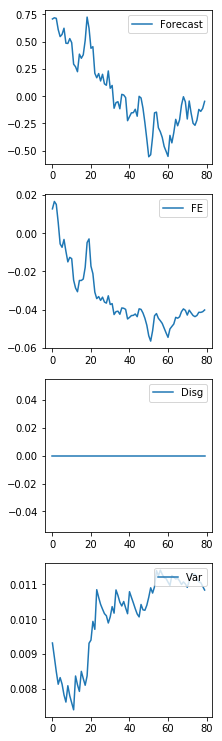

In [37]:
#pl_instance.ForecastPlot()

In [38]:
## compare the forecast from learning model with realized data
#plt.plot(pl_instance.realized)
#plt.plot(pl_moms_dct['Forecast'])